In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [40]:
df=pd.read_csv("C:\\Users\\SS\\Downloads\\MDS Course files\\Data set\\drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [42]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [43]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [44]:
x=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [45]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1]=le_sex.transform(x[:,1])

le_BP=preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
x[:,2]=le_BP.transform(x[:,2])

le_chol=preprocessing.LabelEncoder()
le_chol.fit(['NORMAL','HIGH'])
x[:,3]=le_chol.transform(x[:,3])

x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [46]:
y=df['Drug']
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [47]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(['drugA','drugB','drugC','drugX','drugY'])
y=le.transform(y)
y[0:5]

array([4, 2, 2, 3, 4])

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=3)
print(f"Train size, x:{xtrain.shape}  and   y:{ytrain.shape}")
print(f"Test size, x:{xtest.shape}  and   y:{ytest.shape}")

Train size, x:(140, 5)  and   y:(140,)
Test size, x:(60, 5)  and   y:(60,)


In [49]:
from sklearn.tree import DecisionTreeClassifier
drugtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
drugtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
drugtree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
predtree=drugtree.predict(xtest)

In [52]:
predtree[0:5]

array([4, 3, 3, 3, 3])

In [53]:
ytest[0:5]

array([4, 3, 3, 3, 3])

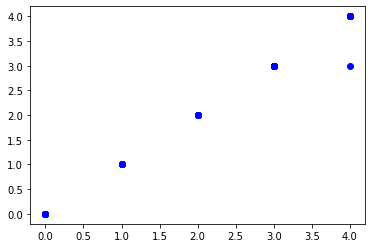

In [54]:
plt.plot(predtree,ytest,'bo')

In [55]:
drugtree.score(xtrain,ytrain)

1.0

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print(f"Decision Tree's Accuracy: {accuracy_score(ytest,predtree)*100}")

Decision Tree's Accuracy: 98.33333333333333


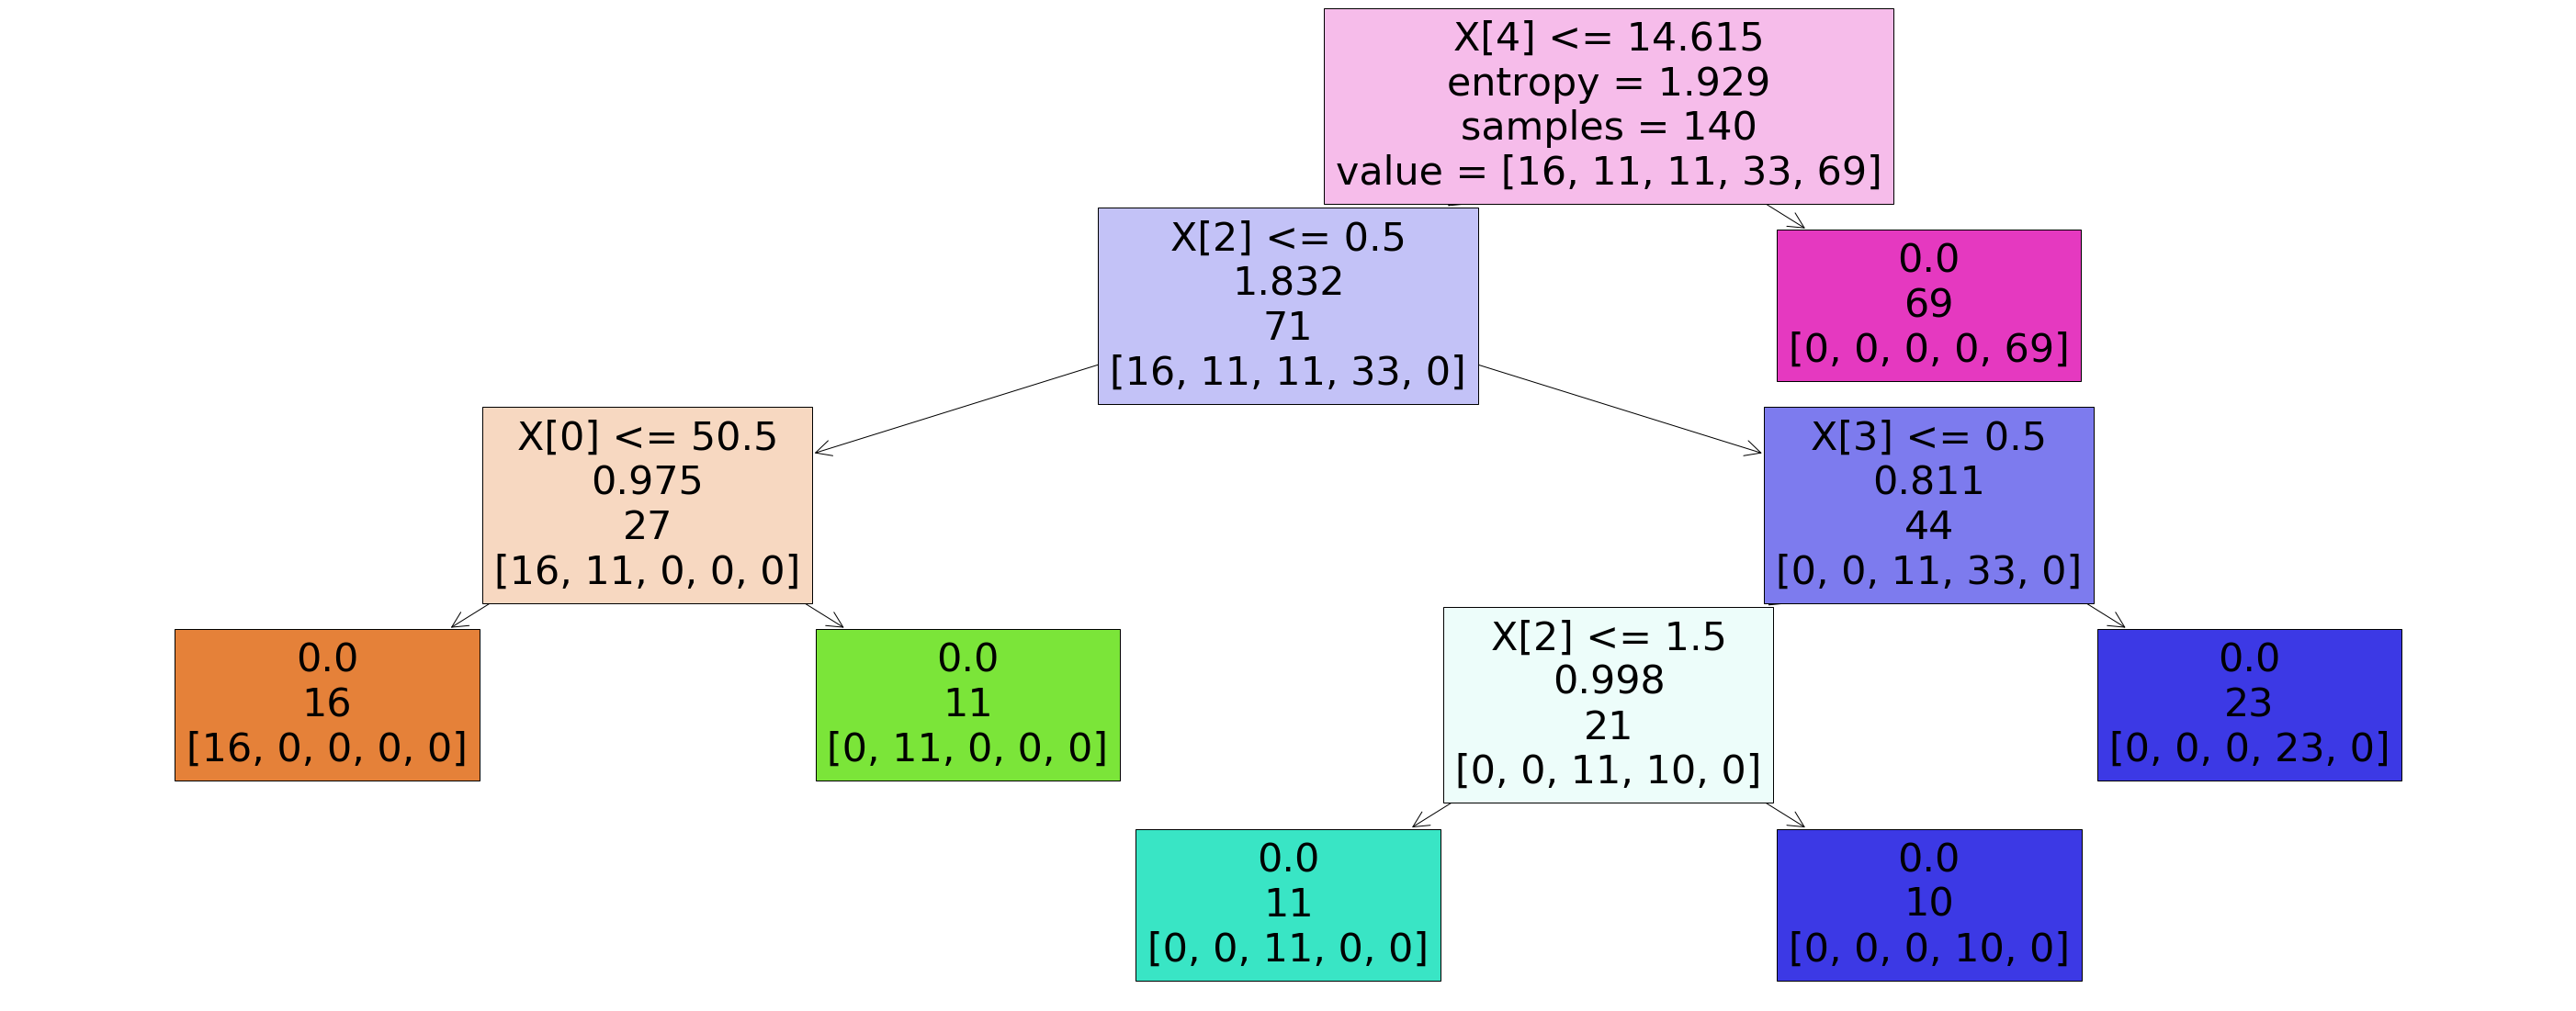

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,20))
plot_tree(drugtree, filled=True, label='root' )
plt.savefig('tree', )

# Decision Tree using ID3 estimator

In [59]:
pip install decision-tree-id3

Note: you may need to restart the kernel to use updated packages.


In [60]:
from id3 import Id3Estimator

In [61]:
estimator=Id3Estimator()
model=estimator.fit(xtrain,ytrain)

In [62]:
ypred=model.predict(xtest)

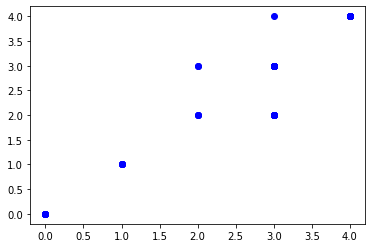

In [63]:
plt.plot(ytest,ypred,'bo')

In [64]:
#To Apply Label Encoder on complete data
# from sklearn import preprocessing
#df=df.apply(preprocessing.LabelEncoer().fit_transform)

In [65]:
filename="Decision Tree Algo Pic Result.png"
featureNames = df.columns[0:5]
targetNames=df['Drug'].unique().tolist()

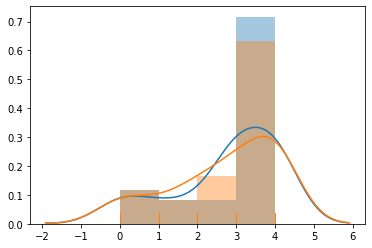

In [66]:
import seaborn as sns
sns.distplot(ytest,hist=True,rug=True,label='Original')
sns.distplot(ypred,hist=True,rug=True,label='Predicted')

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[ 7,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  2,  0],
       [ 0,  0,  7, 13,  1],
       [ 0,  0,  0,  0, 22]], dtype=int64)